# 線形回帰モデル

In [44]:
using Distributions
using LinearAlgebra
using Turing
using Plots

## データ生成

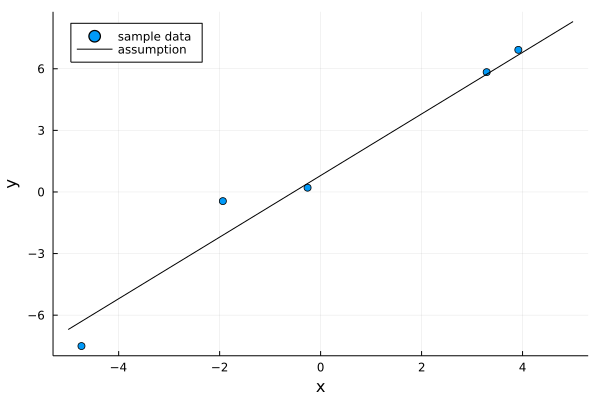

In [107]:
# 真のパラメータ
true_w1 = 1.5
true_w2 = 0.8

# サンプルデータ
N = 5
x_data = rand(Uniform(-5, 5), N)
y_data = true_w1 .* x_data .+ true_w2 .+ rand(Normal(0, 1), N)

# データの描画
xs = -5:5
ys = true_w1 .* xs .+ true_w2
scatter(x_data, y_data, xlabel="x", ylabel="y", label="sample data", legend=:topleft)
plot!(xs, ys, color="black", label="assumption")

## 手計算

In [108]:
function　w_posterior(M)
    m⃗ = zeros(M)
    Σ⃗ = Matrix{Float64}(I, M, M)
    Λ⃗ = inv(Σ⃗)
    return m⃗, Λ⃗
end

w_posterior (generic function with 1 method)

In [109]:
m⃗, Λ⃗ = w_posterior(2);

In [110]:
size(m⃗, 1)

2

In [111]:
length(x_data)

5

In [112]:
λ = rand(1);

In [114]:
λ .* [sum(x * x) for x in x_data]

5-element Vector{Float64}:
  3.4486837092537312
 20.63876052456383
  0.0613542509585556
 14.107071992583695
  9.950034736100998

In [121]:
N = length(x_data)
m = size(m⃗, 1)
Λ⃗hat = zeros(m, m, N)
m⃗hat = zeros(m, N)
    
tmp = λ .* [sum(x * x) for x in x_data]
for n in 1:N
    Λ⃗hat[:, :, n] = tmp[n] .+ Λ⃗
end
;

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 -1.93635  -4.73696  -0.258274  3.9163  3.28905

In [129]:
_tmp = y_data .* x_data
λ .* _tmp

5-element Vector{Float64}:
  0.7943736880601674
 32.70275558347465
 -0.04909667074560812
 24.92838523112514
 17.653808973832398